In [2]:
# 필요 모듈 임포트
import os
import sys
import re
import pandas as pd
import numpy as np

In [ ]:
ppath = ""  # 파일 위치

In [ ]:
rd = pd.read_csv(ppath + "", encoding="CP949")
rd.head()

In [ ]:
df = rd

### Data


#### 데이터 확인하기

<ul>
    <li>데이터의 n행 보기 : df.head(n) / df.tail(n)</li>
    <li>데이터 크기 확인 : df.shape</li>
</ul>


In [ ]:
df.head(4)

In [ ]:
df.tail(10)

In [ ]:
df.shape

In [ ]:
df.info()  # 데이터프레임의 기본 정보를 출력

In [ ]:
df.describe()  # 컬럼별 통계량 확인

In [ ]:
df.columns  # 컬럼명 확인
# [x for x in df.columns] # 컬럼명 전체 확인

In [ ]:
df.index  # 인덱스 확인

In [ ]:
df.dtypes  # 컬럼별 데이터 타입 확인
# 데이터프레임이 191개의 실수형 컬럼과 3개의 객체(주로 문자열) 유형 컬럼으로 구성됨

#### 데이터 선택/제외하기


In [ ]:
df["지역"]

In [ ]:
df.지역

In [ ]:
df[["지역", "Apr-09", "Apr-10"]]

In [ ]:
df.drop(["지역"], axis=1)  # 지역 컬럼 삭제
# ddf
# df.drop([0], axis=1) # 0번째 행 삭제
# df.drop(df.columns[0], axis=1) # 0번째 열 삭제

### 결측치


#### 결측치 확인하기1 : 개수

<ul>
    <li>axis = 0 : 각 컬럼(column)을 기준으로 작업을 수행 → 행(row)을 따라 계산</li>
    <li>axis = 1 : 각 행(row)을 기준으로 작업을 수행 → 컬럼(column)을 따라 계산</li>
</ul>


In [ ]:
# df 결측치 확인
# 컬럼별 결측치 확인
df.isnull().sum(axis=0)  # df.isna().sum()와 동일

In [ ]:
# 행별 결측치 확인
df.isnull().sum(axis=1)  # df.isna().sum(axis = 1)와 동일

In [ ]:
# 전체 결측치 확인
df.isnull().sum().sum()  # df.isna().sum().sum()와 동일

#### 결측치 확인하기2 : 위치/필터링


In [ ]:
# 결측치가 포함된 행만 추출
df_with_missing = df[df.isnull().any(axis=1)]
df_with_missing

In [ ]:
# 결측치가 포함된 열만 추출
df_with_missing_columns = df.loc[:, df.isnull().any(axis=0)]
df_with_missing_columns

In [ ]:
# 결측이 존재하지 않는 데이터만 추출
df.dropna(axis=0).dropna(axis=1)

#### 결측치 확인하기3 : 그림


In [8]:
# 예제 데이터프레임 생성
data = {
    "A": [9, 0, 3, 4, np.nan, None],
    "B": [7, 8, 9, 10, 11, np.nan],
    "C": [13, 14, 15, np.nan, 17, 18],
    "D": [19, 20, 21, np.nan, 23, 24],
    "E": [25, 26, 27, 28, 29.0, 30],
    "F": [7, 3, 12, 34, 35, 4],
}
dt = pd.DataFrame(data)
dt

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,NaN,NaN,28.0,34
4,NaN,11.0,17.0,23.0,29.0,35
5,NaN,NaN,18.0,24.0,30.0,4


<Axes: >

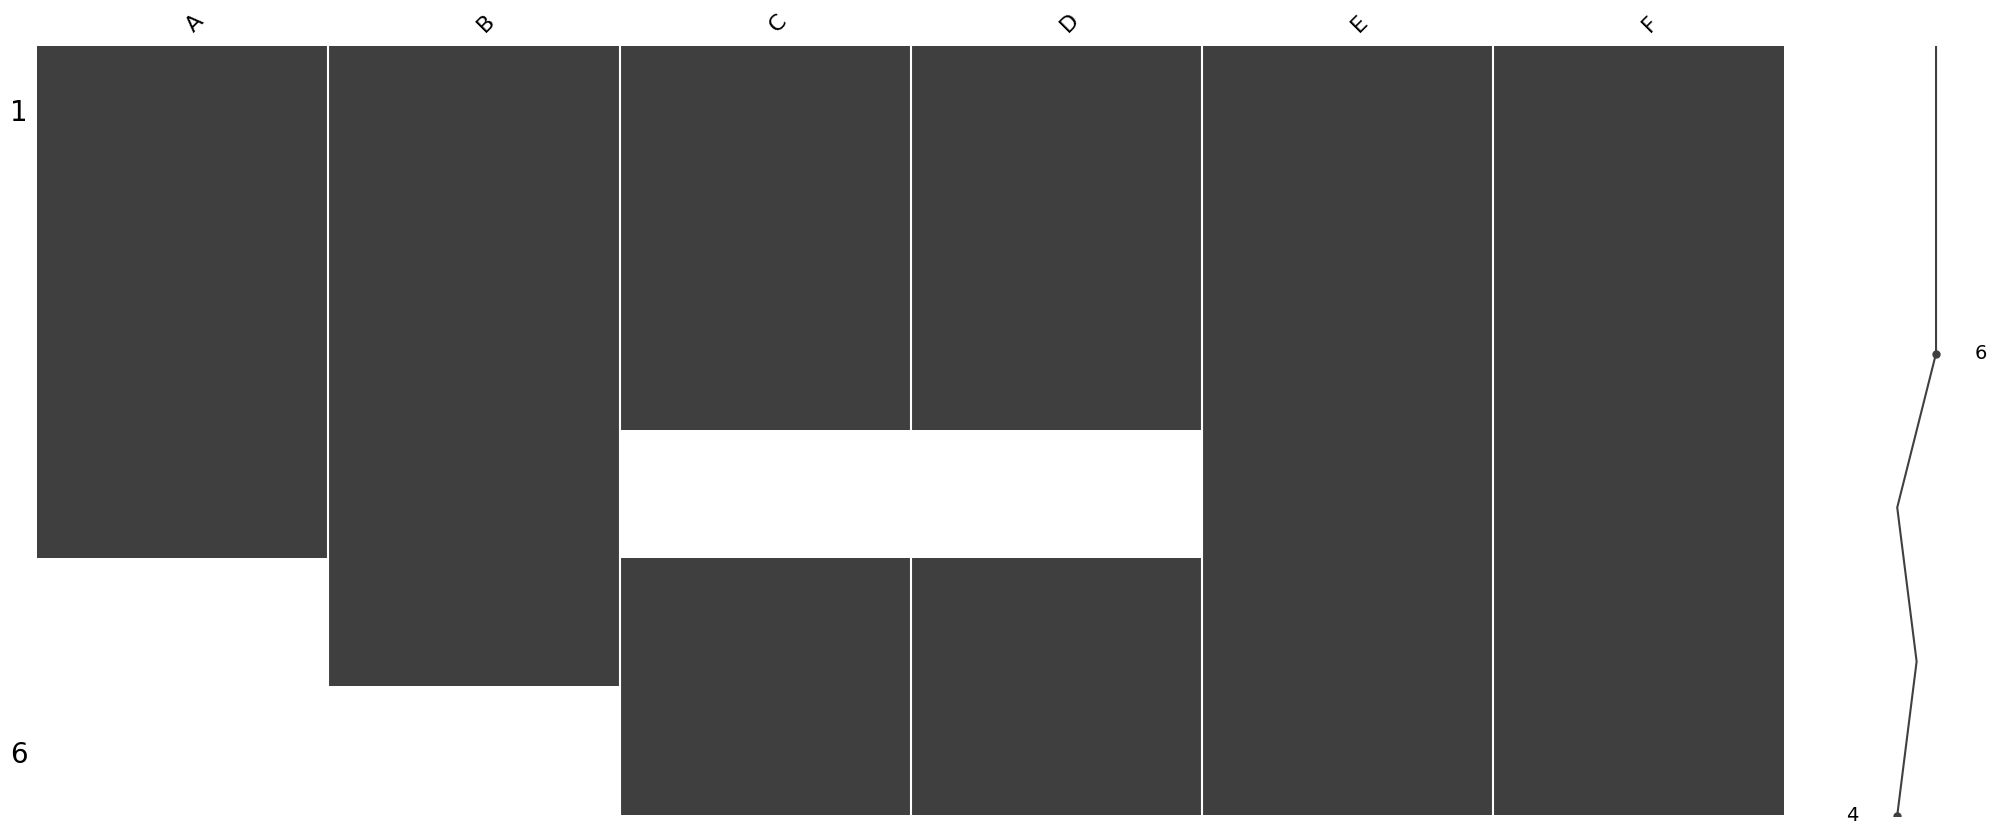

In [9]:
# %pip install missingno : 결측치 확인하는 라이브러리
import missingno as msno

# %pip install matplotlib
# %matplotlib inline
msno.matrix(dt)  # df.sample(200)

<Axes: >

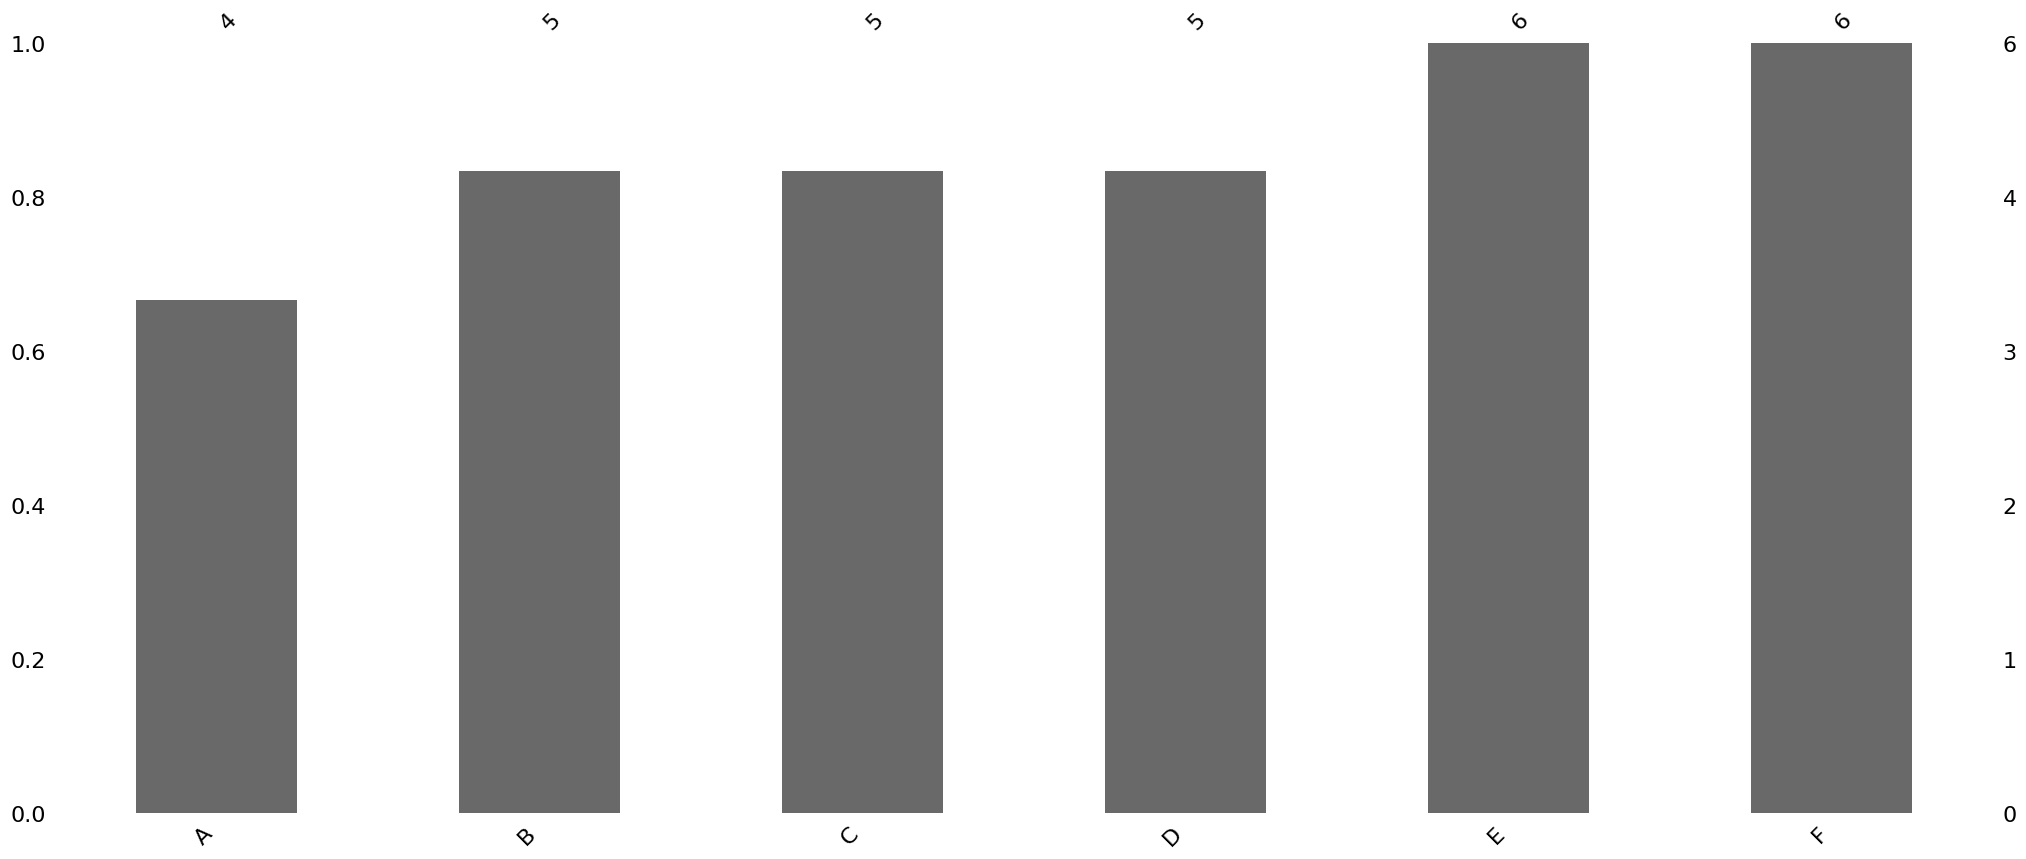

In [10]:
msno.bar(dt)
# y축 : 결측이 없는, 완전한 데이터의 비율
# x축, 결측치가 존재하는 컬럼명

##### 참고


<Axes: >

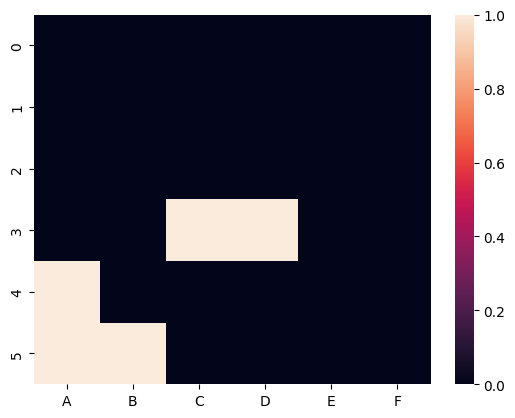

In [11]:
# dt 결측치 확인
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(dt.isnull())  # 결측치 시각화

In [12]:
# 부동산 데이터 결측치
# 결측치 히트맵 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.heatmap(
    df.isnull(),
    cbar=False,  # 오른쪽 컬러바 표시 여부
    cmap="viridis",  # 컬러맵 설정
    yticlabels=False,
)  # y축 레이블 표시 여부

# 그래프 타이틀 및 레이블 설정
plt.title("Missing Values Heatmap")  # 그래프 제목
plt.xlabel("Columns")  # X 축 레이블
plt.ylabel("Index")  # Y 축 레이블

# 그래프 표시
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

#### 결측치 제거


In [13]:
dt

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,NaN,NaN,28.0,34
4,NaN,11.0,17.0,23.0,29.0,35
5,NaN,NaN,18.0,24.0,30.0,4


In [15]:
# 결측치가 있는 행 제거(예제 데이터)
dt_dropped_rows = dt.dropna(axis=0)
dt_dropped_rows

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12


In [16]:
# 결측치가 있는 열 제거(예제 데이터)
dt_dropped_rows = dt.dropna(axis=1)
dt_dropped_rows

,E,F
0,25.0,7
1,26.0,3
2,27.0,12
3,28.0,34
4,29.0,35
5,30.0,4


#### 결측치 대체하기 : 통계량


In [18]:
dt

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,NaN,NaN,28.0,34
4,NaN,11.0,17.0,23.0,29.0,35
5,NaN,NaN,18.0,24.0,30.0,4


In [19]:
# 평균값으로 결측치 대체
dt_mean_filled = dt.fillna(dt.mean())
dt_mean_filled

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,15.4,21.4,28.0,34
4,4.0,11.0,17.0,23.0,29.0,35
5,4.0,9.0,18.0,24.0,30.0,4


In [20]:
# 중앙값으로 결측치 대체
dt_mean_filled = dt.fillna(dt.median())
dt_mean_filled

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,15.0,21.0,28.0,34
4,3.5,11.0,17.0,23.0,29.0,35
5,3.5,9.0,18.0,24.0,30.0,4


In [22]:
# 특정값으로 결측치 대체
dt_zero_filled = dt.fillna(50)
dt_zero_filled

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,50.0,50.0,28.0,34
4,50.0,11.0,17.0,23.0,29.0,35
5,50.0,50.0,18.0,24.0,30.0,4


In [24]:
# 랜덤값으로 대체
np.random.seed(
    123
)  # 랜덤 값의 seed를 고정해주는 코드, 괄호가 동일해야 동일한 결과가 나옴
dt_random_filled = dt.fillna(dt.sample(1).iloc[0])
dt_random_filled

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,14.0,20.0,28.0,34
4,0.0,11.0,17.0,23.0,29.0,35
5,0.0,8.0,18.0,24.0,30.0,4


In [32]:
# 최빈값으로 결측치 대체
dt_mode_filled = dt.fillna(dt.mode().iloc[0])
dt_mode_filled

,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,13.0,19.0,28.0,34
4,0.0,11.0,17.0,23.0,29.0,35
5,0.0,7.0,18.0,24.0,30.0,4


In [33]:
# 이전 값으로 결측치 대체
dt_ffill_filled = dt.fillna(method="ffill")
dt_ffill_filled

C:\Users\cho03\AppData\Local\Temp\ipykernel_13548\2324977898.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dt_ffill_filled = dt.fillna(method='ffill')


,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,15.0,21.0,28.0,34
4,4.0,11.0,17.0,23.0,29.0,35
5,4.0,11.0,18.0,24.0,30.0,4


In [35]:
# 마지막 관측값 대체(Last Observation Carried Forward, LOCF) : 시계열 데이터에서 자주 사용되는 방법, 결측치 이전의 마지막 관측값으로 결측치를 대체

In [36]:
# 다음 값으로 결측치 대체
dt_bfill_filled = dt.fillna(method="bfill")
dt_bfill_filled

C:\Users\cho03\AppData\Local\Temp\ipykernel_13548\2536005020.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dt_bfill_filled = dt.fillna(method='bfill')


,A,B,C,D,E,F
0,9.0,7.0,13.0,19.0,25.0,7
1,0.0,8.0,14.0,20.0,26.0,3
2,3.0,9.0,15.0,21.0,27.0,12
3,4.0,10.0,17.0,23.0,28.0,34
4,NaN,11.0,17.0,23.0,29.0,35
5,NaN,NaN,18.0,24.0,30.0,4


##### 참고 : 어떤 방법이 가장 좋을까?


In [46]:
## 어떤 방법이 가장 좋을까?
# %pip install scikit-learn
from sklearn import datasets

# 아이리스 데이터셋을 로드
iris = datasets.load_iris()
iris_df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)

# 인위적으로 일부 데이터에 결측치를 생성
np.random.seed(1234)  # 결과의 일관성을 위한 seed 설정
for _ in range(100):  # 100개의 결측치를 생성
    i, j = np.random.randint(0, iris_df.shape[0]), np.random.randint(
        0, iris_df.shape[1]
    )
    iris_df.iat[i, j] = np.nan

print(iris_df.isnull().sum())
iris_df

sepal length (cm)    18
sepal width (cm)     20
petal length (cm)    17
petal width (cm)     15
target               21
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,NaN,0.0
2,4.7,3.2,1.3,0.2,NaN
3,4.6,NaN,NaN,0.2,0.0
4,5.0,3.6,NaN,0.2,0.0
...,...,...,...,...,...
145,6.7,NaN,NaN,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,NaN,2.3,2.0


결측치 대체 전후 데이터셋 분포 확인


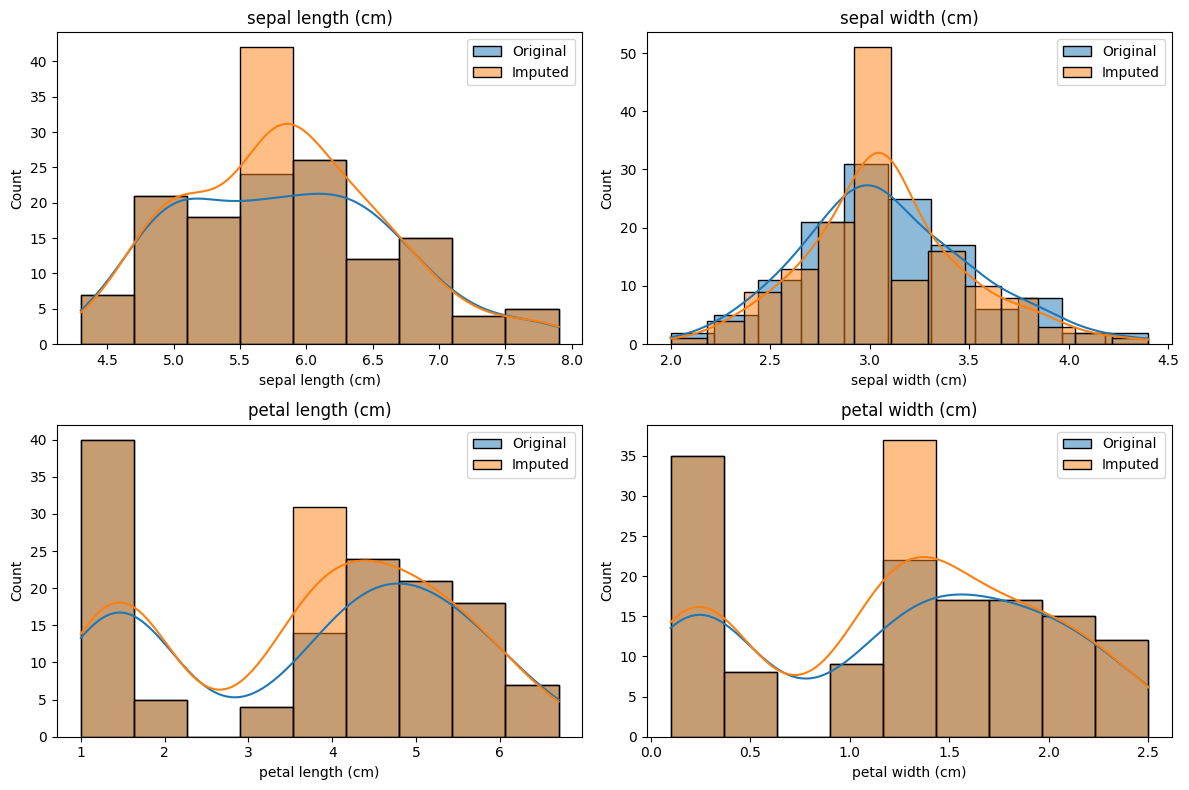

In [58]:
# 결측치 대체 (여기서는 평균값으로 대체)
iris_df_filled = iris_df.fillna(iris_df.mean())

# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()  # axes 배열을 1차원으로 변환

for i, col in enumerate(iris_df.columns[:-1]):  # target 컬럼 제외
    sns.histplot(iris_df.iloc[:, i], kde=True, color="C0", ax=axes[i], label="Original")
    sns.histplot(
        iris_df_filled.iloc[:, i], kde=True, color="C1", ax=axes[i], label="Imputed"
    )

    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()

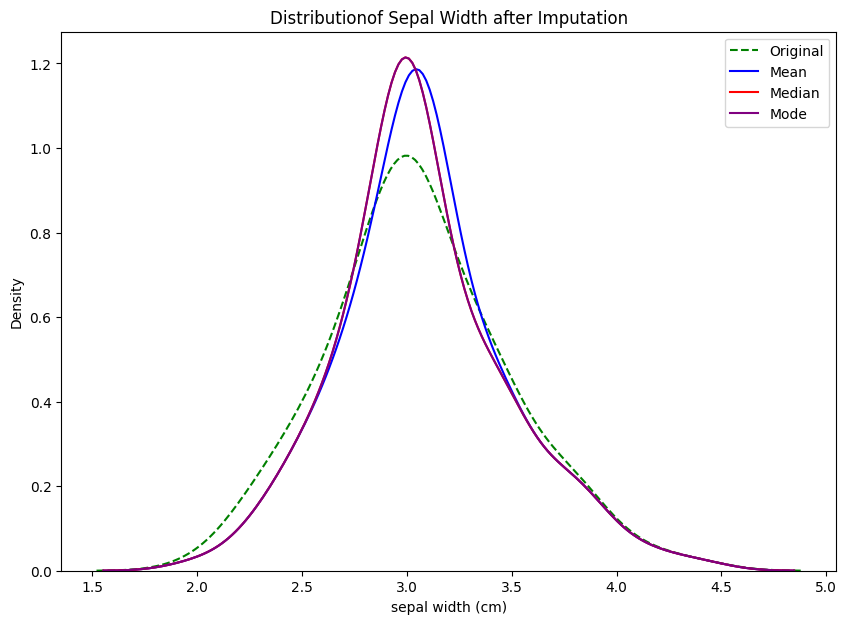

In [59]:
## iris 데이터에 대해 sepal width에 대해서, 평균, 중앙값, 최빈값으로 대체한 경우의 분포 비교 그림, 정답과 비교
# 결측치 대체 : 평균, 중앙값, 최빈값값
mean_filled = iris_df.fillna(iris_df.mean())
median_filled = iris_df.fillna(iris_df.median())
mode_filled = iris_df.fillna(iris_df.mode().iloc[0])

# 원본 데이터셋 로드(결측치 없는 상태)
iris_original = datasets.load_iris()
iris_df_original = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=iris["feature_names"] + ["target"],
)

# 그래프 생성
plt.figure(figsize=(10, 7))
sns.kdeplot(
    iris_df_original["sepal width (cm)"],
    label="Original",
    color="green",
    linestyle="--",
)
sns.kdeplot(mean_filled["sepal width (cm)"], label="Mean", color="blue")
sns.kdeplot(median_filled["sepal width (cm)"], label="Median", color="red")
sns.kdeplot(mode_filled["sepal width (cm)"], label="Mode", color="purple")
plt.legend()
plt.title("Distributionof Sepal Width after Imputation")
plt.show()

#### 결측치 대체하기 : KNN


In [60]:
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성 및 적용
imputer = KNNImputer(
    n_neighbors=5,  # 참고할 이웃의 수
    weights="uniform",  # 이웃간 가중치 설정
)
iris_df_imputed = imputer.fit_transform(iris_df)

# 변환된 데이터를 데이터프레임으로 변환
iris_df_imputed = pd.DataFrame(iris_df_imputed, columns=iris_df.columns)
iris_df_imputed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.50,1.40,0.20,0.0
1,4.9,3.00,1.40,0.18,0.0
2,4.7,3.20,1.30,0.20,0.0
3,4.6,3.24,1.34,0.20,0.0
4,5.0,3.60,1.40,0.20,0.0
...,...,...,...,...,...
145,6.7,3.20,5.60,2.30,2.0
146,6.3,2.50,5.00,1.90,2.0
147,6.5,3.00,5.20,2.00,2.0
148,6.2,3.40,5.60,2.30,2.0


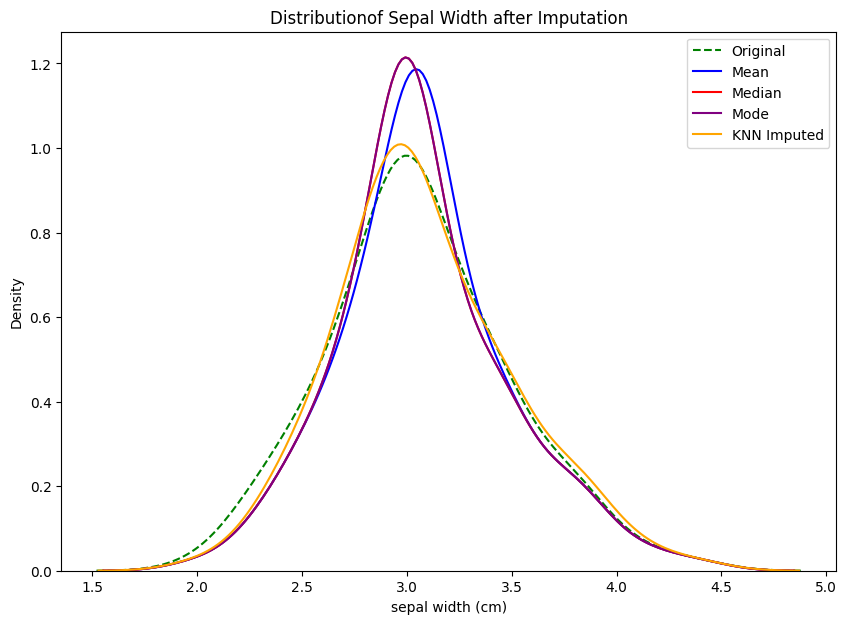

In [62]:
# 그래프 생성
plt.figure(figsize=(10, 7))
sns.kdeplot(
    iris_df_original["sepal width (cm)"],
    label="Original",
    color="green",
    linestyle="--",
)
sns.kdeplot(mean_filled["sepal width (cm)"], label="Mean", color="blue")
sns.kdeplot(median_filled["sepal width (cm)"], label="Median", color="red")
sns.kdeplot(mode_filled["sepal width (cm)"], label="Mode", color="purple")
sns.kdeplot(iris_df_imputed["sepal width (cm)"], label="KNN Imputed", color="orange")

plt.legend()
plt.title("Distributionof Sepal Width after Imputation")
plt.show()

### 이상치


In [ ]:
rd = pd.read_csv(ppath + "/1. data/airquality.csv")
rd.head(2), rd.shape

#### 이상치 확인하기 : boxplot


In [ ]:
dt = rd
# dt에 대해 boxplot을 활용해 이상치 확인
plt.figure(figsize=(10, 6))
dt.boxplot()
plt.show()

# sns.boxplot(dt)
# plt.show()

In [ ]:
# 수염을 벗어난 이상치 데이터만 출력하기
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column > upper_bound])]


for i in range(dt.shape[1]):
    # print(i)
    outliers = get_outliers(dt, dt.columns[i])
    if outliers.shape[0] > 0:
        print(f"Outliers in {dt.columns[i]} : ")
        print(outliers)
        print()
    # print()

#### 이상치 확인하기 : LoF


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

clf = LocalOutlierFactor(
    n_neighbors=5, contamination=0.1  # 이웃의 수 설정  # 이상치 비율 설정
)

dt = rd
dt = dt.dropna()  # dt의 na값 제거
# dt = dt.values.reshape(-1, 1) # 2차원 배열로 변환

In [ ]:
clf.fit_predict(dt)  # LoF 적용
scores = clf.negative_outlier_factor_  # 이상치 점수 계산
scores

In [ ]:
plt.plot(scores.tolist())  # 이상치 점수 그래프 출력

In [ ]:
plt.hist(scores.tolist(), bins=50)
# 출력값 설명

## n : 각 막대에 있는 데이터의 개수를 나타내는 배열, 히스토그램의 각 막대는 데이터 범위의 한 부분을 대표하며, n은 각 범위에 속하는 데이터 포인트의 수임
## bins : 막대의 경계값이 담긴 배열, 이 값은 히스토그램의 각 막대가 어떤 데이터 값을 포함하는 지를 나타내는 경계를 정의
## patches : 히스토그램의 각 막대를 나타내는 matplotlib의 Rectangle 객체에 대한 리스트, 이 객체들을 사용하여 그래픽의 각 막대를 나중에 수정할 수 있음

In [ ]:
plt.hist(scores, bins=50, density=True)  # 막대 개수 설정  # 밀도 플롯 설정

sns.kdeplot(scores, color="r", ax=plt.gca())

plt.axvline(-1.5, color="red", linestyle="--")  # 이상치 경계선

plt.show()

In [ ]:
# 원래 데이터에서 이상치들만 확인
outliers = dt[scores < -1.5]
outliers

plt.plot(dt["Ozone"], dt["Solar.R"], "o", color="b", markersize=5)
plt.plot(outliers["Ozone"], outliers["Solar.R"], "o", color="r", markersize=5)
plt.xlabel("Ozone")
plt.ylabel("Solar.R")

# 이상치 번호 표시
for i, txt in enumerate(outliers.abs):
    plt.annotate(txt, (outliers["Ozone"].iat[i], outliers["Solar.R"].iat[i]))

#### 이상치 제거하기


In [ ]:
dt = dt.drop(outliers.index)
dt

### 중복값


#### 중복값 확인


In [63]:
import seaborn as sns

df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [64]:
# 중복값의위치를 표시하는 불리언 시리즈 생성
# keep = False를 설정하여 모든 중복값을 표시
duplicates = df.duplicated(keep=False)  # 'first', 'last'
df[duplicates]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [65]:
# 중복값의 인덱스(위치)
duplicate_indices = df.index[duplicates]
duplicate_indices

Index([101, 142], dtype='int64')

#### 중복값 제거


In [66]:
# 중복된 값 중 첫번째 등장하는 값만 Keep
duplicated_mask = df.duplicated(keep="first")

# 중복된 값 중 첫번째 값만 Keep 하는 데이터프레임
df_without_last_duplicates = df[
    ~duplicated_mask
]  # sams as df.drop_duplicated(keep='first)
df_without_last_duplicates

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 조건에 따른 데이터 선택


In [ ]:
rd = pd.read_csv(ppath + "/1. data/house_price_index.csv", encoding="CP949")
rd.head

In [ ]:
df = rd.dropna()
df.index = ["row_" + str(idx) for idx in df.index]  # 임의로 row index 이름 변경
df

#### 1. 특정 컬럼만 선택/제거

<ul>
    <ul>loc(Label-based indexing)
        <li>설명 : loc는 명시적으로 행과 열 레이블을 사용하여 데이터를 선택</li>
        <li>용도 : 특정 행과 열 이름을 사용하여 데이터에 접근하거나 슬라이싱할 때 사용</li>
    </ul>
    <ul>iloc(Integer-based indexing)
        <li>설명 : iloc는 정수 위치를 사용하여 데이터를 선택</li>
        <li>용도 : 행과 열의 정수 인덱스를 사용하여 데이터에 접근하거나 슬라이싱할 때 사용</li>
    </ul>
</ul>


In [67]:
df[["지역"]]  # df['지역]

KeyError: "None of [Index(['지역'], dtype='object')] are in the [columns]"

In [ ]:
df[["지역", "Dec-03", "Dec-04", "Dec-05"]]  # 여러개 컬럼 선택

In [ ]:
df.loc[:, "지역":"Dec-03"]

In [ ]:
df.iloc[:, 0:2]

#### 2. 특정 행만 선택하기

<ul>
    <ul>Pandas 슬라이싱
        <li>Pandas 에서 행 레이블을 기준으로 슬라이싱할 때는 범위의 끝 값도 포함</li>
        <li>df['row_0':'row_3']는 row_3까지 포함해서 데이터를 가져옴</li>
    </ul>
    <ul>파이썬 기본 슬라이싱
        <li>파이썬의 기본 인덱싱 규칙에서는 슬라이싱할 때 끝 값이 포함되지 않음</li>
        <li>list[0:3]는 인덱스 0, 1, 2의 요소를 가져옴</li>
    </ul>
</ul>


In [ ]:
# df.loc['row_0']는 결과가 Series
df.loc[["row_0"]]  # 결과는 데이터프레임

In [ ]:
df.loc[["row_0", "row_1", "row_3"]]  # 0, 1, 3행을 가져옴

In [ ]:
df.loc["row_0":"row_3"]  # 0, 1, 2, 3행을 가져옴

In [ ]:
df["Nov-03":"Jan-04"]  # 안됨, 행 기준이기 때문

In [ ]:
df.loc[:, "Nov-03":"Jan-04"]  # 됨

#### 3. 특정 컬럼과 행 선택하기


In [ ]:
df.iloc[1:4, 1:3]  #

In [ ]:
df.iloc[0:4]

In [ ]:
df.loc[0]  # 안됨!, 행 이름이 다르기 때문

In [ ]:
df.loc["row_0"]  # 됨

In [ ]:
# df[[0:3, 6]] 안됨
df.iloc[0:3, 6]  # 됨

In [ ]:
df.iloc[0:3, np.r_[0:5, 100]]  # 본 적 없음

In [ ]:
cols = list(range(0, 5)) + [100]  # 0, 1, 2, 3, 4, 100 : 더 자주 사용
df.iloc[0:3, cols]

In [ ]:
df.iloc[0:3, [0, 100]]

#### 4. 특정 조건에 맞는 컬럼만 선택


In [ ]:
# 07년 4월 데이터가 100 이상인 경우만
df[df["Apr-07"] >= 100]

In [ ]:
# 07년 4월 데이터가 100 이상이면서 08년 3월 데이터는 100 이하인 경우
df[(df["Apr-07"] >= 100) & (df["Mar-08"] <= 100)]

In [ ]:
# 09년 11월 데이터만 오른차순으로 정렬
df["Nov-09"].sort_values(ascending=True)

In [ ]:
# 19년 4월 데이터가 100 이상이면서 18년 4월 데이터는 100 이하인 경우에 대해서, 18년 4월 기준으로 오른차순으로 정리
df2 = df[(df["Apr-19"] >= 100) & (df["Apr-18"] <= 100)]

df3 = df2.sort_values(by="Apr-18", ascending=True)
df3

In [69]:
%pip install natsort 
# natsort 패키지 설치
# 사전식 정렬 말고, 자연스러운 정렬

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from natsort import natsorted

natsorted(df["Nov-09"])

### 그룹변수를 활용해서 그룹별 통계량 계산


In [ ]:
df = df.dropna()
df

In [ ]:
# 지역 정보에서 "도" 인 경우만 선택
df["지역"] = [x[:2] for x in dt["지역"]]
# dt['지역'].value_counts()

# dt['지역'].value_counts() 값이 2개 초과인 경우만 선택
location = dt["지역"].value_counts > 2
location = location[location]

dt = dt[dt["지역"].isin(location.index)]
dt["지역"].value_counts
dt

#### 방법1


In [ ]:
# 지역별로 18-19년 11월 평균과 표준편차 계산하기

grouped = dt.groupby("지역")
grouped_nov_19 = grouped["Nov-19"].agg(["mean", "std"])
grouped_nov_18 = grouped["Nov-18"].agg(["mean", "std"])

In [ ]:
grouped_stats = pd.concat(
    [grouped_nov_18, grouped_nov_19], axis=1
)  # 열의 형태로 2개의 데이터프레임 합치기
grouped_stats.columns = ["Nov-19_mean", "Nov-19_std", "Nov-18_mean", "Nov-18_std"]
grouped_stats

In [ ]:
# 결과 동일
# grouped_stats = pd.DataFrame(grouped_nov_19, columns = ['Nov-19_mean','Nov-19_std'])
# grouped_stats['Nov-18_mean'] = grouped_nov_18['mean']
# grouped_stats['Nov-18_std'] = grouped_nov_18['std']
# grouped_stats

#### 방법 2


In [ ]:
# 지역별로, 18-19년 11월 평균과 표준편차 계산하기
grouped_stats = df.groupby("지역").agg(
    col1=("Nov-19", "mean"),
    col2=("Nov-19", "std"),
    col3=("Nov-18", "mean"),
    col4=("Nov-18", "std"),
)

# 컬럼 이름 수정
grouped_stats.columns = ["Nov-19_mean", "Nov-19_std", "Nov-18_mean", "Nov-18_std"]
grouped_stats

In [ ]:
# # 동일 결과
# grouped_stats = df.groupby("지역").agg({
#     'Nov-19':['mean','std'],
#     'Nov-18':['mean','std']
# })

# # 열 이름을 간단하게 만들기 위해 플랫하게 변환
# grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]

# grouped_stats.head(10)